In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("UWRL_river_velocimetry_dataset_angle_variance_NEW.csv")

In [3]:
print(df.columns)
df

Index(['datetime', 'x', 'y', 'v_x', 'v_y', 'velocity', 's2n', 'corr',
       'sun_altitude', 'sun_azimuth', 'spacial_location', 'LRO_discharge',
       'LRO_discharge_site', 'turbidity', 'vegetation', 'visibility',
       'cloudcover', 'solarradiation', 'uvindex', 'conditions', 'angle',
       'angle_var', 'angle_var_support'],
      dtype='object')


,datetime,x,y,v_x,v_y,velocity,s2n,corr,sun_altitude,sun_azimuth,...,turbidity,vegetation,visibility,cloudcover,solarradiation,uvindex,conditions,angle,angle_var,angle_var_support
0,2024-04-10 13:38:23,0.155,9.645,NaN,NaN,NaN,0.0,0.0,0.928858,3.66246,...,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN
1,2024-04-10 13:38:23,0.285,9.645,NaN,NaN,NaN,0.0,0.0,0.928858,3.66246,...,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN
2,2024-04-10 13:38:23,0.415,9.645,NaN,NaN,NaN,0.0,0.0,0.928858,3.66246,...,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN
3,2024-04-10 13:38:23,0.545,9.645,NaN,NaN,NaN,0.0,0.0,0.928858,3.66246,...,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN
4,2024-04-10 13:38:23,0.675,9.645,NaN,NaN,NaN,0.0,0.0,0.928858,3.66246,...,5.17,none,9.9,0.0,942,9,Clear,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7999995,2024-07-06 11:18:04,0.515,9.645,NaN,NaN,NaN,0.0,0.0,1.140879,2.36181,...,3.60,dense,9.9,0.0,818,8,Clear,NaN,NaN,NaN
7999996,2024-07-06 11:18:04,0.645,9.645,NaN,NaN,NaN,0.0,0.0,1.140879,2.36181,...,3.60,dense,9.9,0.0,818,8,Clear,NaN,NaN,NaN
7999997,2024-07-06 11:18:04,0.775,9.645,NaN,NaN,NaN,0.0,0.0,1.140879,2.36181,...,3.60,dense,9.9,0.0,818,8,Clear,NaN,NaN,NaN
7999998,2024-07-06 11:18:04,0.905,9.645,NaN,NaN,NaN,0.0,0.0,1.140879,2.36181,...,3.60,dense,9.9,0.0,818,8,Clear,NaN,NaN,NaN


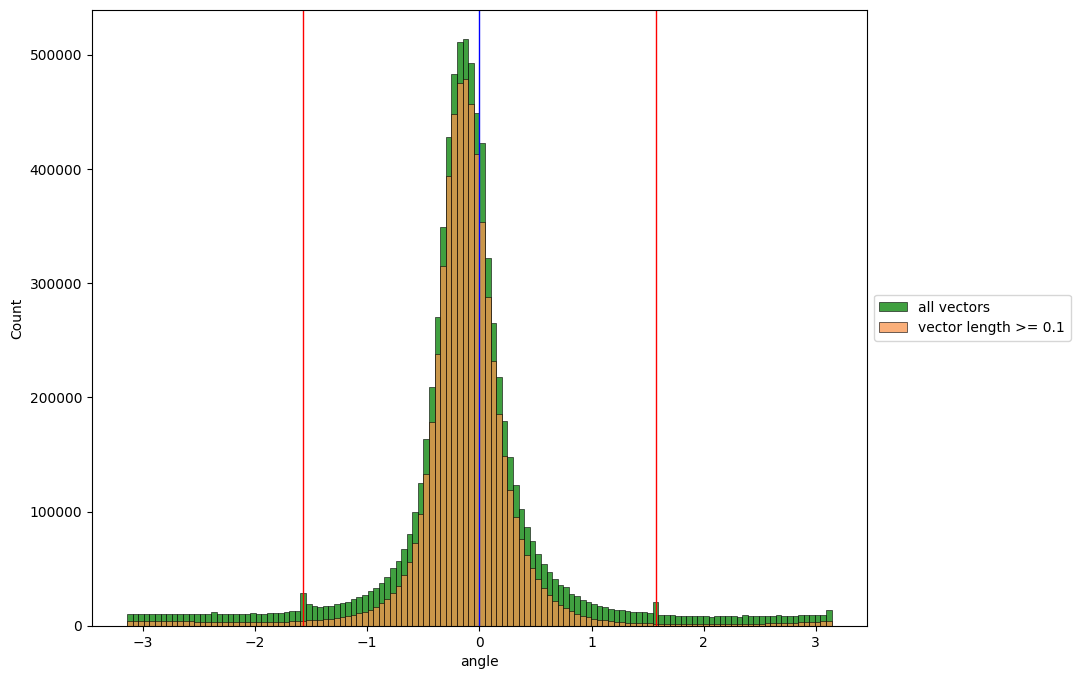

In [4]:
plt.figure(figsize=(10, 8))

sns.histplot(
    data=df, 
    x='angle',
    binwidth=0.05,
    label='all vectors',
    color='green'
)

sns.histplot(
    data=df[(df.velocity >= 0.1)],
    x='angle',
    binwidth=0.05,
    label='vector length >= 0.1',
    color='#F9944E'
)

plt.axvline(x=0, color='blue', linestyle='-', linewidth=1)
plt.axvline(x= np.pi/2, color='red', linestyle='-', linewidth=1)
plt.axvline(x=-np.pi/2, color='red', linestyle='-', linewidth=1)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()

In [4]:
df2 = df[~(df.angle_var.isna())]

In [6]:
df2[['v_x', 'velocity', 'angle', 'angle_var']]

,v_x,velocity,angle,angle_var
13,0.000000,0.000000,0.000000,0.000000
14,0.000000,0.000000,0.000000,0.000000
15,0.000000,0.000000,0.000000,4.138962
16,0.000720,0.001076,-0.837981,0.004726
17,0.015040,0.024452,-0.908318,0.022886
...,...,...,...,...
7999987,-0.025200,0.045730,-2.154432,4.722058
7999988,-0.005000,0.006474,-2.453234,4.518858
7999989,-0.016532,0.017444,-2.816918,5.237594
7999990,0.010640,0.019482,-0.993044,3.993944


<Axes: xlabel='velocity', ylabel='angle_var'>

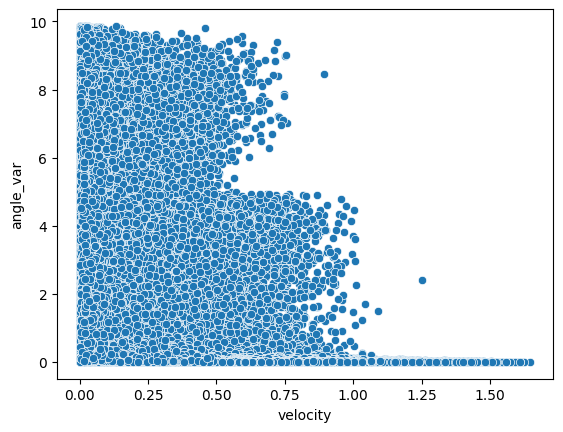

In [7]:
sns.scatterplot(
    data=df2,
    x='velocity',
    y='angle_var',
)

<Axes: xlabel='angle_var', ylabel='Count'>

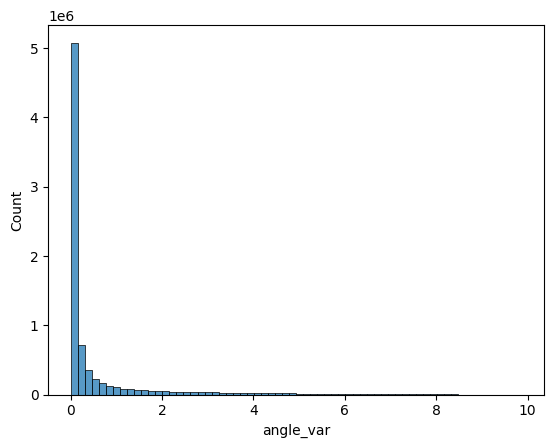

In [8]:
sns.histplot(
    data=df2,
    x='angle_var',
    bins=64
)

<Axes: xlabel='velocity', ylabel='angle_var'>

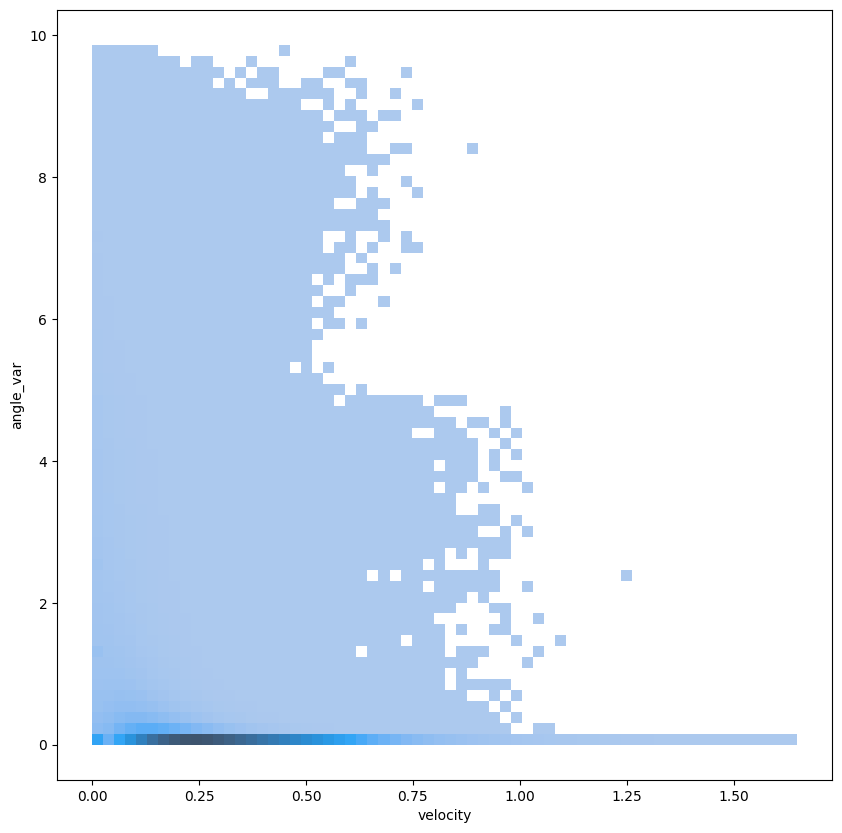

In [9]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2,
    x='velocity',
    y='angle_var',
    bins=64
)

<Axes: xlabel='v_x', ylabel='angle_var'>

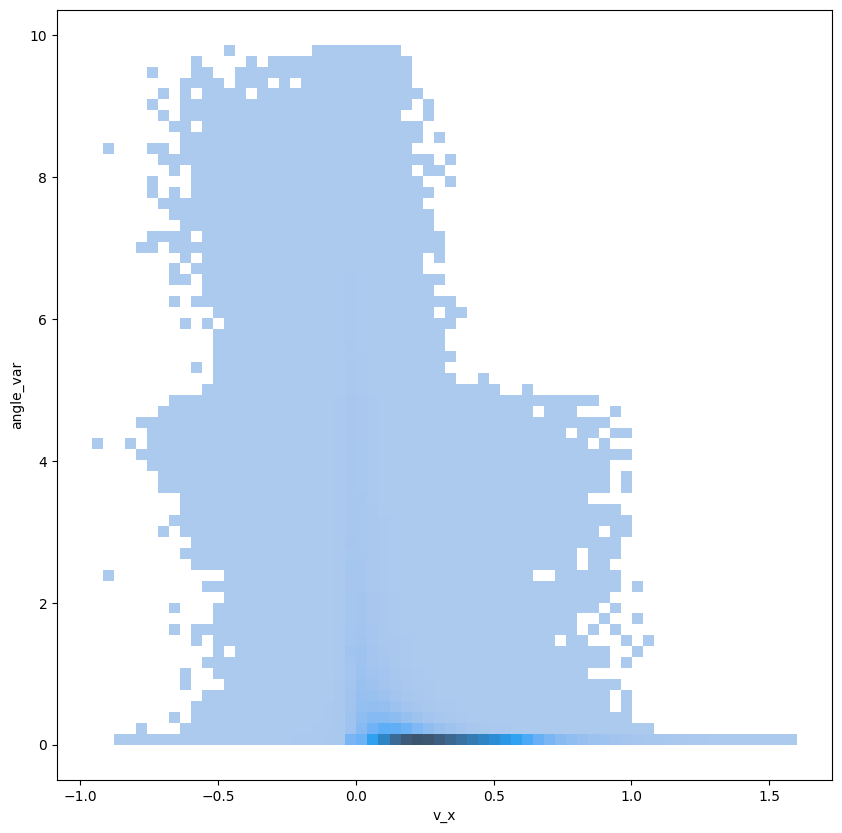

In [10]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2, 
    x='v_x',
    y='angle_var',
    bins=64
)

<Axes: xlabel='velocity', ylabel='angle_var'>

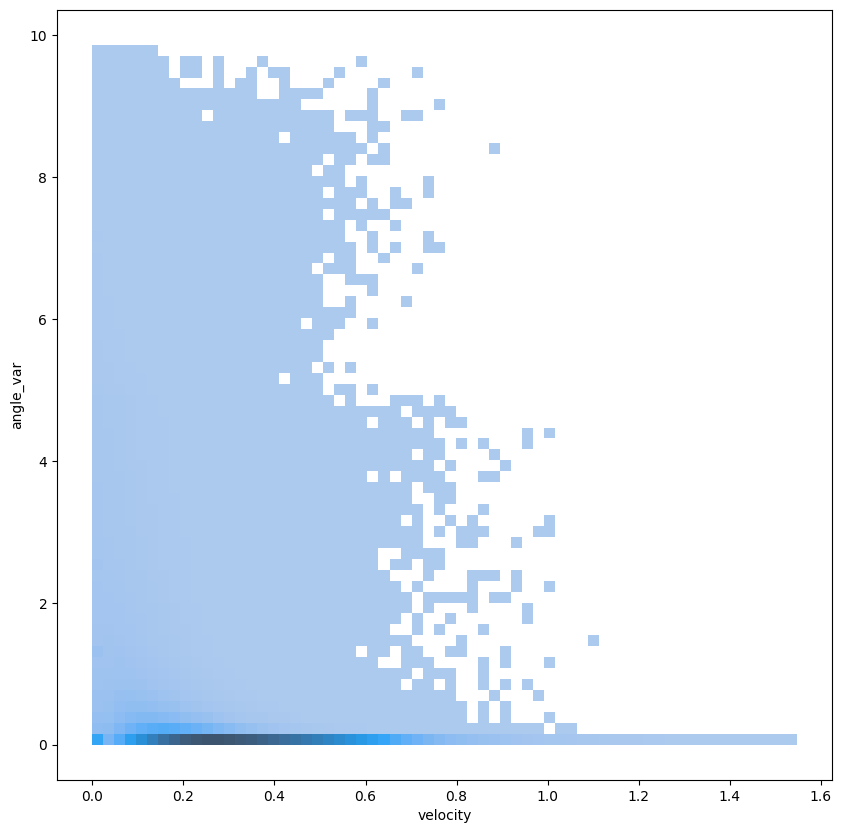

In [11]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[df2.cloudcover == 0],
    x='velocity',
    y='angle_var',
    bins=64
)

<Axes: xlabel='velocity', ylabel='angle_var'>

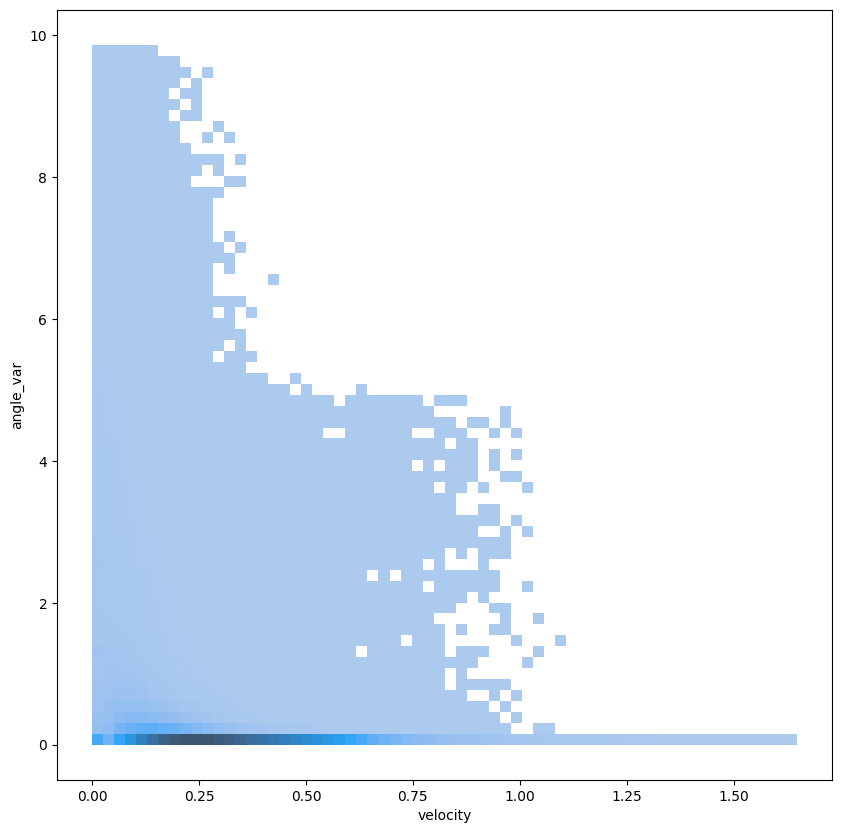

In [5]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[df2.v_x >= 0],
    x='velocity',
    y='angle_var',
    bins=64
)

<Axes: xlabel='velocity', ylabel='angle_var'>

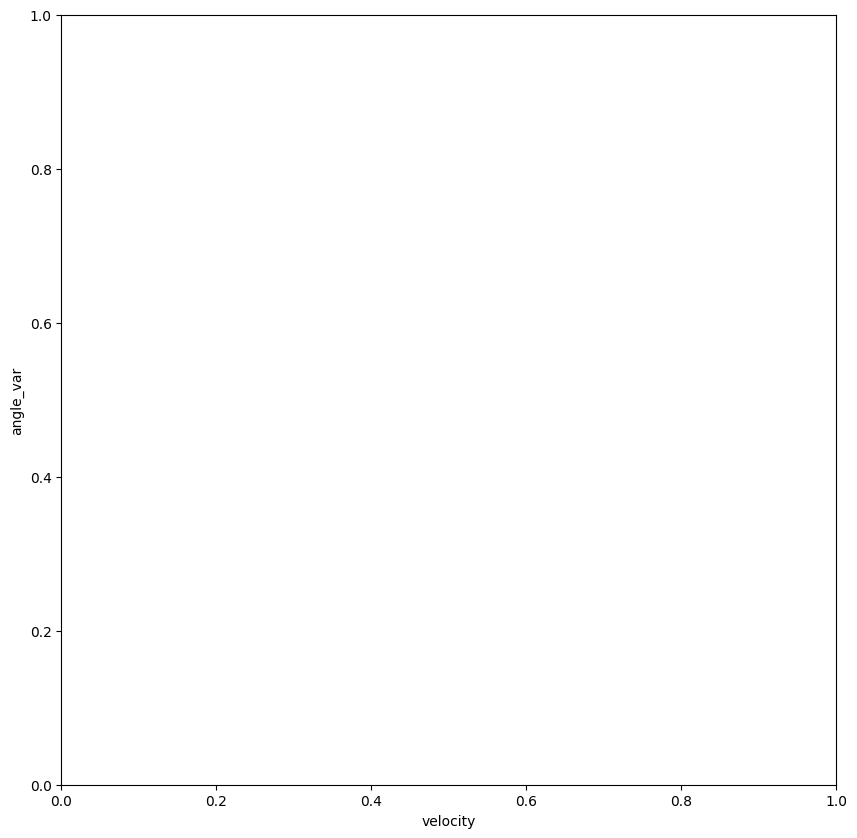

In [6]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[(df2.cloudcover == 0) & (df2.v_x >= 0) & (df2.angle_var_support == 8)],
    x='velocity',
    y='angle_var',
    bins=64
)

<Axes: xlabel='velocity', ylabel='angle_var'>

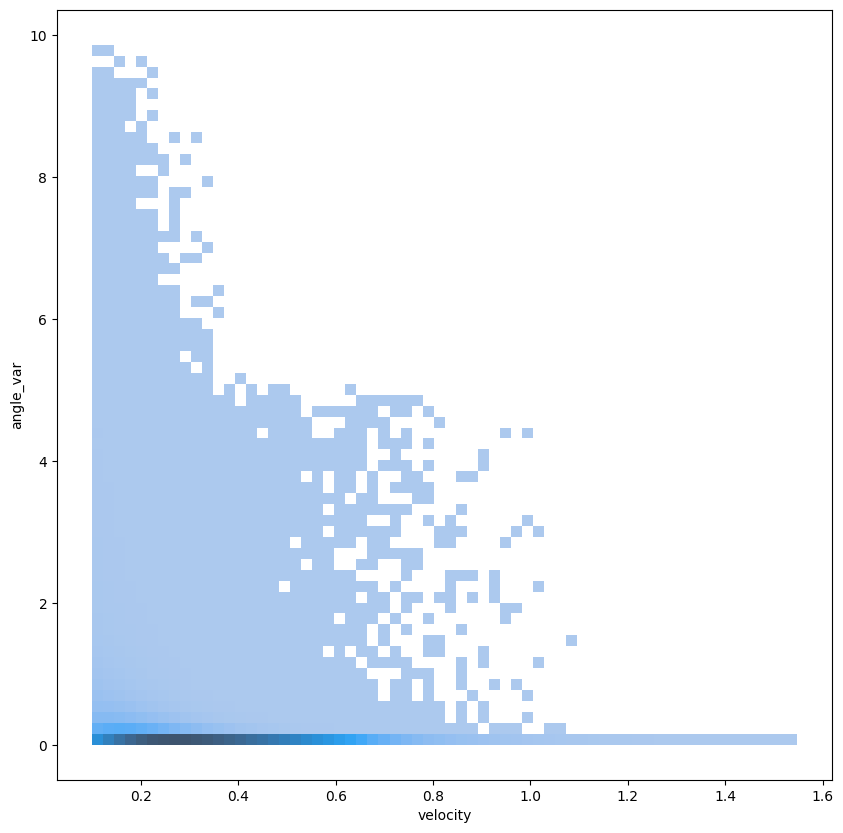

In [7]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df2[(df2.cloudcover == 0) & (df2.v_x >= 0) & (df2.velocity > 0.1)],
    x='velocity',
    y='angle_var',
    bins=64
)

<Axes: xlabel='y', ylabel='angle_var'>

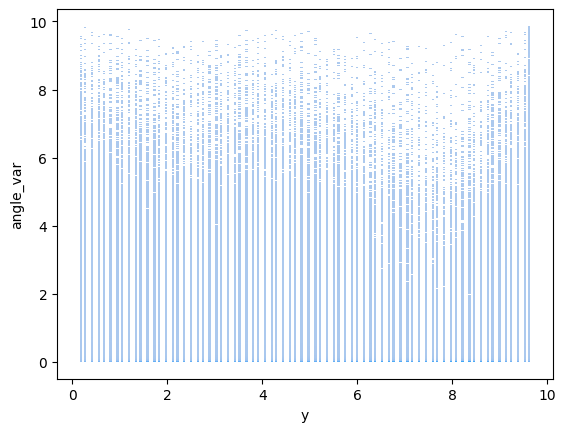

In [8]:
sns.histplot(
    data=df,
    x='y',
    y='angle_var'
)

<Axes: xlabel='y', ylabel='Count'>

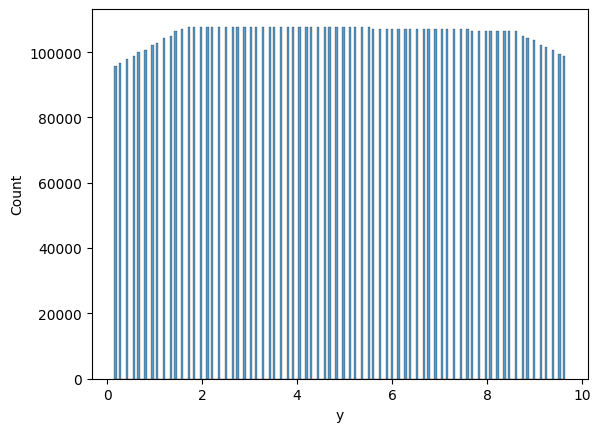

In [9]:
sns.histplot(
    data=df2,
    x='y'
)

<Axes: xlabel='y', ylabel='angle_var'>

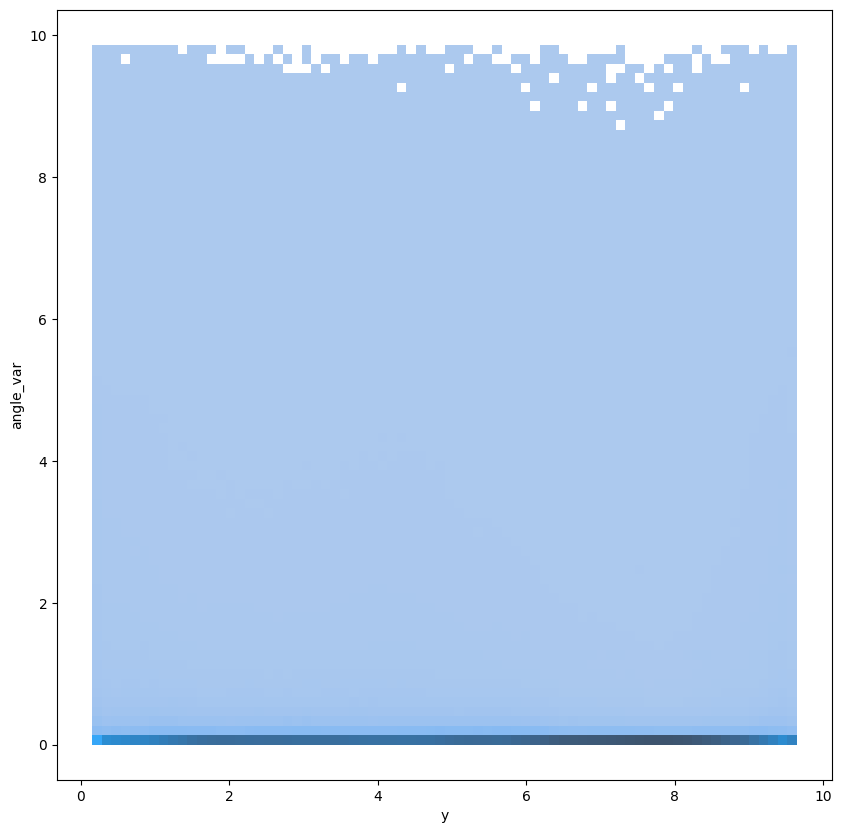

In [10]:
plt.figure(figsize=(10, 10))

sns.histplot(
    data=df,
    x='y',
    y='angle_var',
    bins=74
)

nan


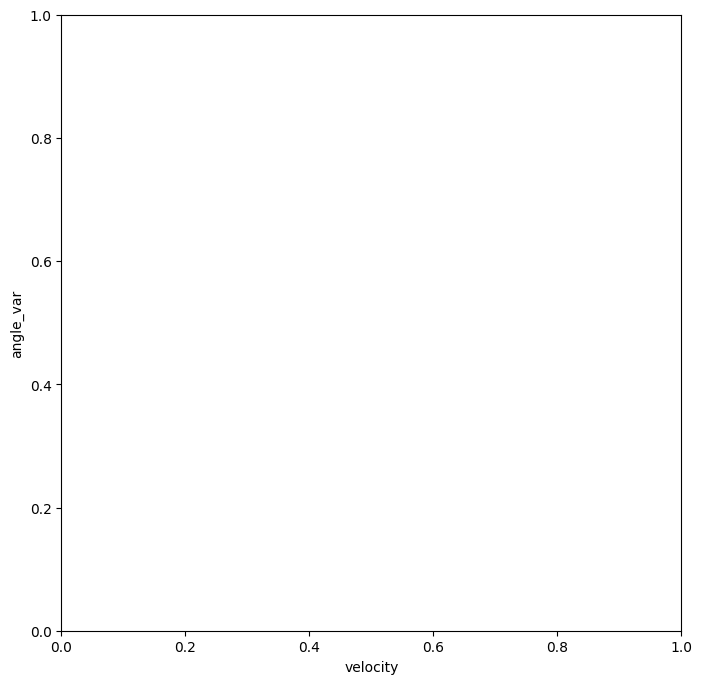

1.0


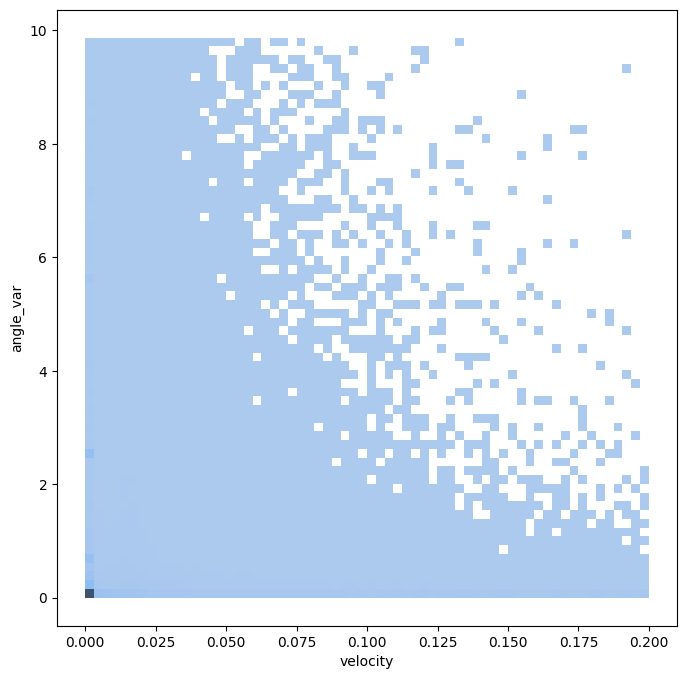

2.0


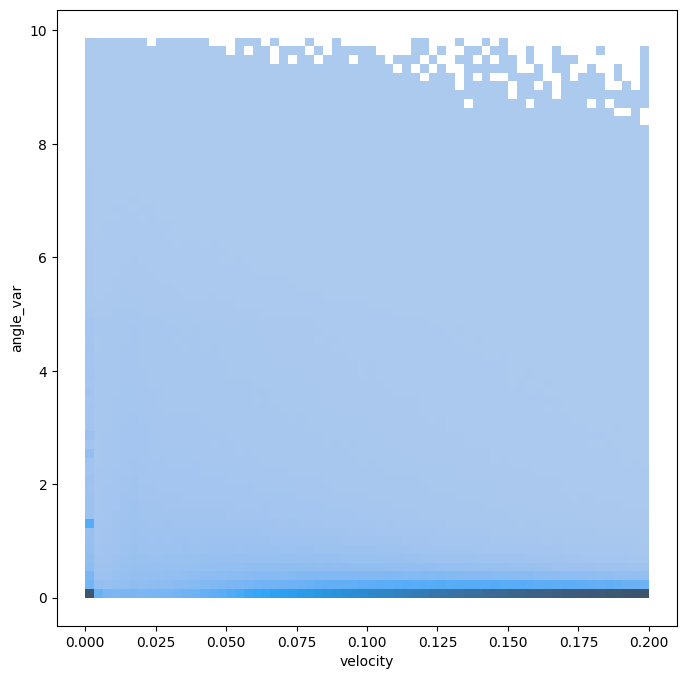

In [11]:
for i in sorted(df.angle_var_support.unique()):

    print(i)

    plt.figure(figsize=(8, 8))

    sns.histplot(
        data=df[(df.velocity < 0.2) & (df.angle_var_support == i)],
        x='velocity',
        y='angle_var',
        bins=64
    )

    plt.show()
    plt.close()

In [12]:
df.angle_var_support.unique()

array([nan,  1.,  2.])